# Mushroom Classification 

### Importing the packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the csv file of the dataset

In [366]:
df = pd.read_csv("/content/drive/MyDrive/AI Final/secondary_data.csv",sep=';')

# Examining the Data

In [367]:
# The dataset used in this project is "mushrooms.csv" which contains 8124 instances of mushrooms with 23 features
# like cap-shape, cap-surface, cap-color, bruises, odor, etc. 

In [368]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [370]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [371]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [372]:
df.shape

(61069, 21)

In [373]:
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


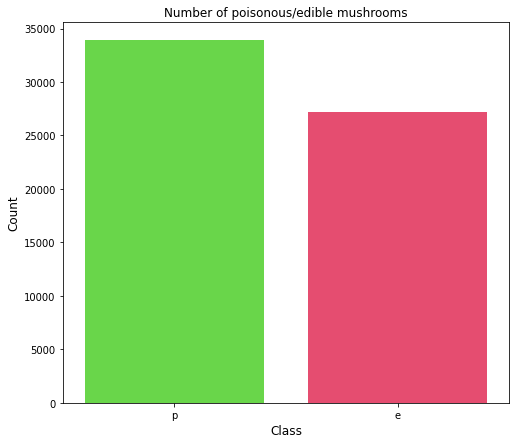

In [374]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')

plt.show()

# Data Manipulation

In [375]:
df = df.astype('category')

In [376]:
df.dtypes

class                   category
cap-diameter            category
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height             category
stem-width              category
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object

In [377]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [378]:
df


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,1481,6,2,6,0,2,3,10,1577,...,4,7,11,0,4,1,2,7,0,3
1,1,1614,6,2,6,0,2,3,10,1681,...,4,7,11,0,4,1,2,7,0,2
2,1,1362,6,2,6,0,2,3,10,1662,...,4,7,11,0,4,1,2,7,0,3
3,1,1372,2,3,1,0,2,3,10,1463,...,4,7,11,0,4,1,5,7,0,3
4,1,1419,6,3,6,0,2,3,10,1537,...,4,7,11,0,4,1,5,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,73,5,7,11,0,3,2,2,283,...,5,8,12,1,6,0,1,7,0,0
61065,1,82,2,7,11,0,3,2,2,208,...,5,8,12,1,6,0,1,7,0,0
61066,1,82,5,7,11,0,3,2,2,276,...,5,8,12,1,6,0,1,7,0,2
61067,1,79,2,7,11,0,3,2,2,246,...,5,8,12,1,6,0,1,7,0,2


In [379]:
df['veil-type']

0        0
1        0
2        0
3        0
4        0
        ..
61064    1
61065    1
61066    1
61067    1
61068    1
Name: veil-type, Length: 61069, dtype: int64

In [380]:
df=df.drop(["veil-type"],axis=1)

### Let's look at the correlation between the variables

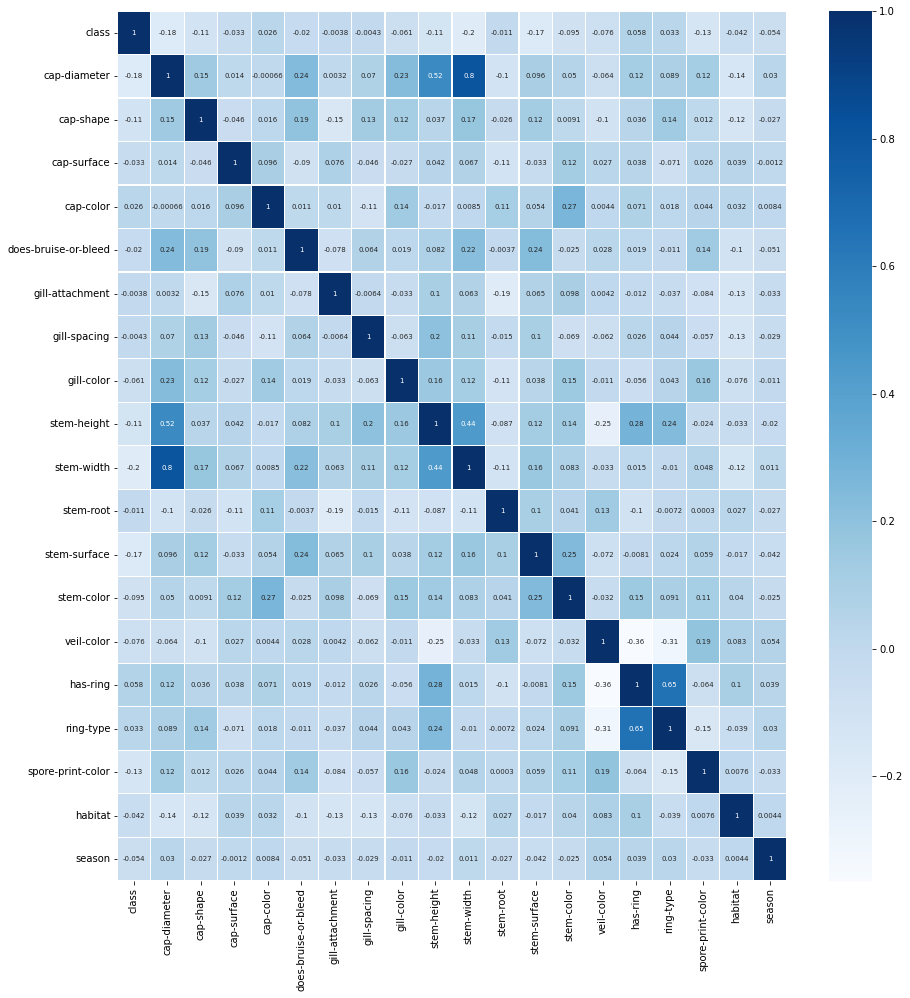

In [381]:
plt.figure(figsize=(15,16))
sns.heatmap(df.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);


# Preparing the Data

In [382]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)   

# Classification Methods

## 1. Decision Tree Classification

In [383]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

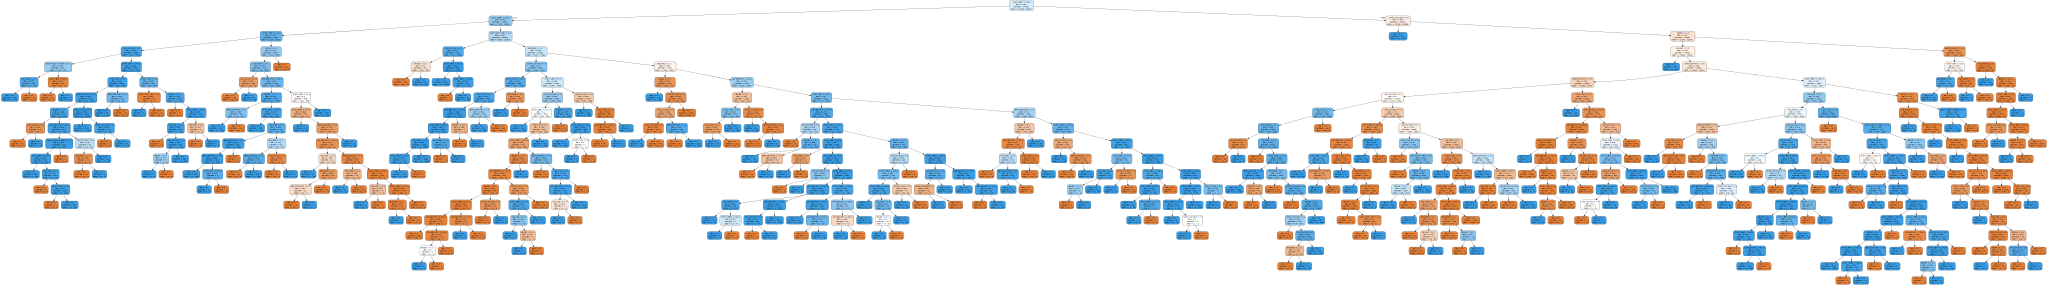

In [384]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

graph

In [385]:
X.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat',
       'season'],
      dtype='object')

In [386]:
dt.score(X_test, y_test)

0.9967250695922711

In [387]:
y_pred_dt = dt.predict(X_test)

In [388]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2721
           1       1.00      1.00      1.00      3386

    accuracy                           1.00      6107
   macro avg       1.00      1.00      1.00      6107
weighted avg       1.00      1.00      1.00      6107



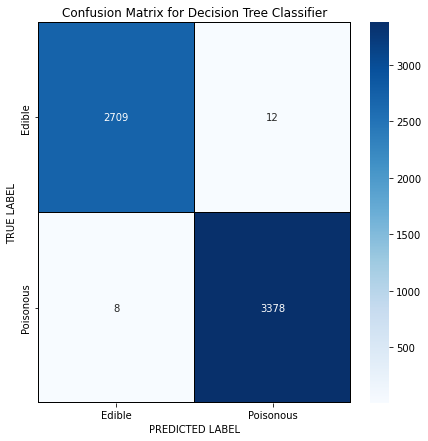

In [389]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

plt.show()

## 2. Logistic Regression Classification

In [390]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( max_iter=1000)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6156869166530211

In [391]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52      2721
           1       0.63      0.74      0.68      3386

    accuracy                           0.62      6107
   macro avg       0.61      0.60      0.60      6107
weighted avg       0.61      0.62      0.61      6107



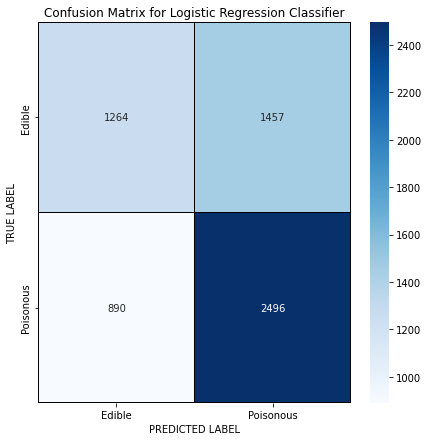

In [392]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')

plt.show()

## 3. KNN Classification

In [393]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN Value K=25')
print('\n')
knn.score(X_test,y_test)

KNN Value K=25




0.8218437858195513

In [394]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2721
           1       0.84      0.83      0.84      3386

    accuracy                           0.82      6107
   macro avg       0.82      0.82      0.82      6107
weighted avg       0.82      0.82      0.82      6107



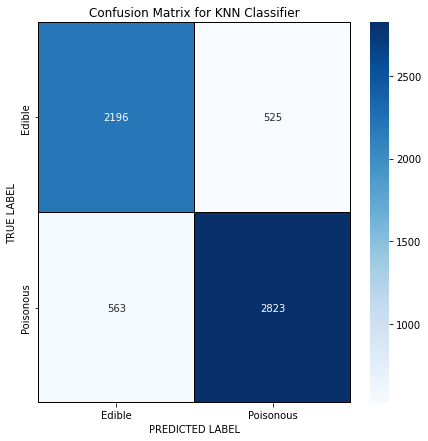

In [395]:
cm = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')

plt.show()

### 4. Naive Bayes Classification

In [396]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb.score(X_test, y_test)

0.6210905518257737

In [397]:
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63      2721
           1       0.71      0.54      0.61      3386

    accuracy                           0.62      6107
   macro avg       0.63      0.63      0.62      6107
weighted avg       0.64      0.62      0.62      6107



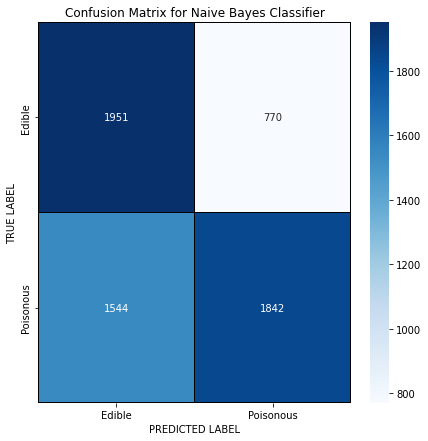

In [398]:
cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [399]:
preds = dt.predict(X_test)

print(preds[:10])
print(y_test[:10].values)

# 0 - Edible
# 1 - Poisonous

[0 1 0 1 0 1 0 1 1 0]
[0 1 0 1 0 1 0 1 1 0]


## Feature importance

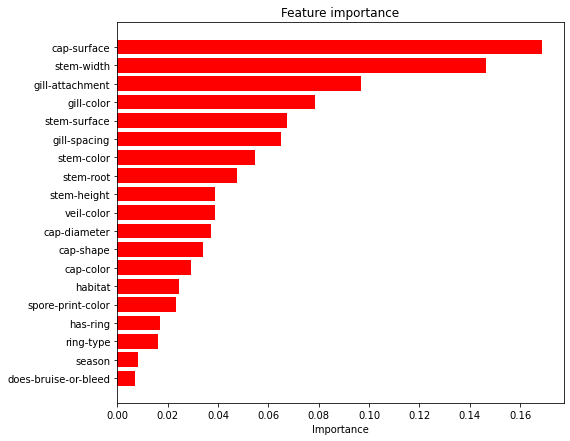

In [400]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()